<a href="https://colab.research.google.com/github/sushantkumar-estech/predicting-google-stock-price-using-RNN-LSTM/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Recurrent Neural Network

# Part 1 - Date Preprocessing

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Importing the training set
dataframe_train = pd.read_csv('/content/drive/My Drive/ML_Dataset/RNN/Google_Stock_Price_Train.csv')
training_set = dataframe_train.iloc[:,1:2].values  # made the numpy array

In [4]:
# Fature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train) 

In [6]:
# Reshaping to 3D stucture
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

In [9]:
# Adding the first LSTM Layer and soem Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.20))

In [10]:
# Adding a second LSTM layer ans dome Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, ))
regressor.add(Dropout(0.20))

# Adding a third LSTM layer ans dome Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, ))
regressor.add(Dropout(0.20))

# Adding a fourth LSTM layer ans dome Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.20))

# Adding the output layer
regressor.add(Dense(units = 1))

In [11]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0441
Epoch 2/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0049
Epoch 13/100
38/38 [=====

In [13]:
# Part - 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataframe_test = pd.read_csv('/content/drive/My Drive/ML_Dataset/RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataframe_test.iloc[:,1:2].values  # made the numpy array
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [14]:
# Getting the real stock price of 2017
dataframe_total = pd.concat((dataframe_train['Open'], dataframe_test['Open']), axis = 0)
inputs = dataframe_total[len(dataframe_total) - len(dataframe_test) - 60:].values
inputs = inputs.reshape(-1,1) # reshaping the numpy array for RNN
inputs = sc.transform(inputs) # scaling the inputs same as training set, for the RNN, as per requirement
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # transforming the data set to 3D as per RNN requirement
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[788.367  ]
 [785.60364]
 [785.8238 ]
 [787.2087 ]
 [790.3373 ]
 [795.8144 ]
 [800.77844]
 [802.67834]
 [802.9338 ]
 [802.9222 ]
 [803.12756]
 [803.3338 ]
 [803.4732 ]
 [804.1221 ]
 [805.0547 ]
 [809.44037]
 [816.0251 ]
 [822.9728 ]
 [826.5917 ]
 [822.4943 ]]


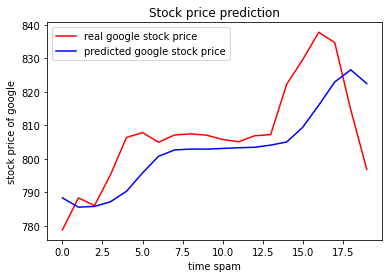

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'real google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted google stock price')
plt.title('Stock price prediction')
plt.xlabel('time spam')
plt.ylabel('stock price of google')
plt.legend()
plt.show()

In [16]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

11.813218285798293


In [17]:
print(rmse/837)

0.0141137613928295
